# Task 6

## Part 1

Get data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv 

Plot: 
- The temperature 
- the mean temmperature each day 
- the mean temperature for each month


In [1]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get data from url 
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
# get data from row 21 (skip metadata), set date (col 1) as index. 
# See: https://stackoverflow.com/questions/36606931/how-to-set-in-pandas-the-first-column-and-row-as-index 
# see: https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas 
weather = pd.read_csv(url, skiprows=22)

# preview of data
weather.head(10)

/tmp/ipykernel_13985/189639187.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv(url, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


In [3]:
# change date format to datetime. See: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 
weather['date'] = pd.to_datetime(weather['date'])

/tmp/ipykernel_13985/2053970700.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather['date'] = pd.to_datetime(weather['date'])


In [4]:
# set date as index. See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html 
# This allows to select given series based on time intervals (otherwhise, other methods such as df.str.contains() should be used)
# See: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html 
weather.set_index('date', inplace = True)

weather.head(5)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


In [5]:
# Clean up data. Remove incomplete data on 1996 (one day in April, and then July-Dec)
new_start = '1997-01-01 00:00:00'
weather = weather.loc[new_start:]

weather.head(5)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1997-01-01 00:00:00,3,0.0,1,-2.9,1,-3.0,-3.6,4.8,98,1031.2,2,7,2,350,2,11,0.0,40000,999,1
1997-01-01 01:00:00,3,0.0,1,-2.9,5,-3.1,-3.9,4.6,93,1031.4,2,9,2,30,2,11,0.0,40000,999,1
1997-01-01 02:00:00,3,0.0,1,-3.1,5,-3.2,-3.8,4.6,95,1031.7,2,7,2,20,2,11,0.0,40000,999,1
1997-01-01 03:00:00,3,0.0,1,-3.2,5,-3.3,-3.9,4.6,95,1031.7,2,8,2,20,2,11,0.0,40000,999,1
1997-01-01 04:00:00,3,0.0,1,-3.5,5,-3.6,-4.3,4.5,94,1031.7,2,7,2,10,2,11,0.0,40000,999,1


In [6]:
# select only data from 1997, because the codespace is not able to handle the full dataset. 
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html 
start = "1997-01-01 00:00:00"
end = "1997-12-31 23:00:00"
weather_1997 = weather.loc[start:end]

# Show data
# weather_1997

<Axes: xlabel='date', ylabel='temp'>

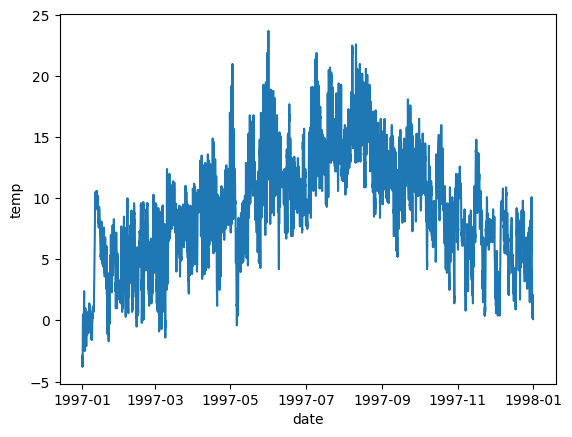

In [7]:
# plot temperature in 1997. See: https://seaborn.pydata.org/generated/seaborn.lineplot.html 
fig, ax = plt.subplots()
sns.lineplot(data=weather_1997, x = 'date', y = 'temp')
#ax.set_xticks([])
#ax.set_xlabel("apr-dec 1997")

In [15]:
# Resampling to get daily mean temperatures 
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html 
# Resampling time params: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases 
# round numbers for readability. See: https://www.geeksforgeeks.org/python/pandas-dataframe-round/ 
daily_t = weather['temp'].resample('D').mean().round(2)

daily_temp = pd.DataFrame(daily_t, index = daily_t.index)

# show 
daily_temp.head(5)


,temp
date,
1997-01-01,-1.85
1997-01-02,0.10
1997-01-03,-0.45
1997-01-04,-1.06
1997-01-05,-0.18


<Axes: xlabel='date', ylabel='temp'>

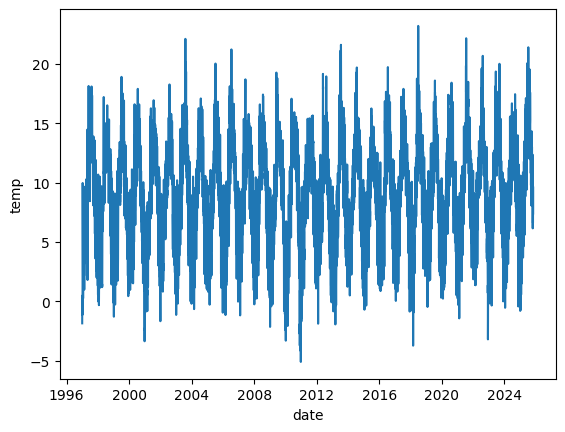

In [13]:
# plot mean dailty temperature
sns.lineplot(data=daily_temp, x = 'date', y = 'temp')

In [22]:
# resample data to get mean temperature for each month (month start)
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html 
# Resampling time params: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases 
# round numbers for readability. See: https://www.geeksforgeeks.org/python/pandas-dataframe-round/

monthly_t = mean_t = weather['temp'].resample('MS').mean().round(2)

monthly_temp = pd.DataFrame(monthly_t, index = monthly_t.index)

# show 
# monthly_temp.head(5)
# add length? 

<Axes: xlabel='date', ylabel='temp'>

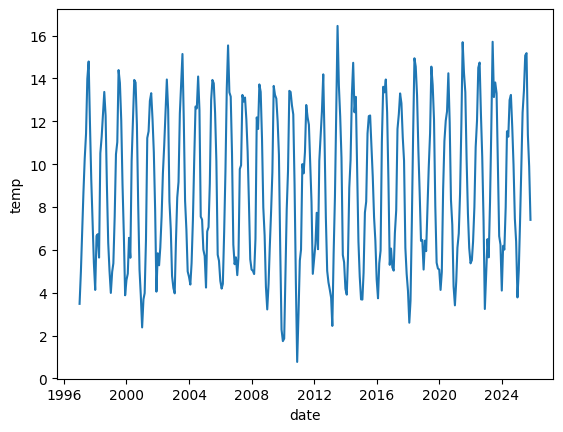

In [23]:
# plot the data 
sns.lineplot(data=monthly_temp, x = 'date', y = 'temp')

In [24]:
# add rolling???

## Part 2

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)

In [ ]:
# windspeed 

weather